# MDS_Assignment3_B09705039_劉惟恩

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
plt.rcParams["figure.dpi"] = 100
np.set_printoptions(suppress=True)

In [2]:
import warnings
warnings.filterwarnings("ignore")

## 1.

### (a)

In [3]:
# Read Data
SECOM_data_df = pd.read_excel("MDS_Assignment3_SECOM.xlsx", sheet_name = "secom", index_col = 0)
# print dataframe
display(SECOM_data_df)
# Print summary
SECOM_data_df.describe()

,Sensor_1,Sensor_2,Sensor_3,Sensor_4,Sensor_5,Sensor_6,Sensor_7,Sensor_8,Sensor_9,Sensor_10,...,Sensor_583,Sensor_584,Sensor_585,Sensor_586,Sensor_587,Sensor_588,Sensor_589,Sensor_590,Label,Time
1,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1,19/07/2008 11:55:00
2,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1,19/07/2008 12:32:00
3,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1,19/07/2008 13:17:00
4,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1,19/07/2008 14:43:00
5,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1,19/07/2008 15:22:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1563,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.3424,-0.0045,...,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720,-1,16/10/2008 15:13:00
1564,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,1.4333,-0.0061,...,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720,-1,16/10/2008 20:49:00
1565,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,NaN,NaN,...,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231,-1,17/10/2008 05:26:00
1566,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,1.4622,-0.0072,...,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941,-1,17/10/2008 06:01:00


,Sensor_1,Sensor_2,Sensor_3,Sensor_4,Sensor_5,Sensor_6,Sensor_7,Sensor_8,Sensor_9,Sensor_10,...,Sensor_582,Sensor_583,Sensor_584,Sensor_585,Sensor_586,Sensor_587,Sensor_588,Sensor_589,Sensor_590,Label
count,1561.000000,1560.000000,1553.000000,1553.000000,1553.000000,1553.0,1553.000000,1558.000000,1565.000000,1565.000000,...,618.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1567.000000
mean,3014.452896,2495.850231,2200.547318,1396.376627,4.197013,100.0,101.112908,0.121822,1.462862,-0.000841,...,97.934373,0.500096,0.015318,0.003847,3.067826,0.021458,0.016475,0.005283,99.670066,-0.867262
std,73.621787,80.407705,29.513152,441.691640,56.355540,0.0,6.237214,0.008961,0.073897,0.015116,...,87.520966,0.003404,0.017180,0.003720,3.578033,0.012358,0.008808,0.002867,93.891919,0.498010
min,2743.240000,2158.750000,2060.660000,0.000000,0.681500,100.0,82.131100,0.000000,1.191000,-0.053400,...,0.000000,0.477800,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,0.000000,-1.000000
25%,2966.260000,2452.247500,2181.044400,1081.875800,1.017700,100.0,97.920000,0.121100,1.411200,-0.010800,...,46.184900,0.497900,0.011600,0.003100,2.306500,0.013425,0.010600,0.003300,44.368600,-1.000000
50%,3011.490000,2499.405000,2201.066700,1285.214400,1.316800,100.0,101.512200,0.122400,1.461600,-0.001300,...,72.288900,0.500200,0.013800,0.003600,2.757650,0.020500,0.014800,0.004600,71.900500,-1.000000
75%,3056.650000,2538.822500,2218.055500,1591.223500,1.525700,100.0,104.586700,0.123800,1.516900,0.008400,...,116.539150,0.502375,0.016500,0.004100,3.295175,0.027600,0.020300,0.006400,114.749700,-1.000000
max,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,100.0,129.252200,0.128600,1.656400,0.074900,...,737.304800,0.509800,0.476600,0.104500,99.303200,0.102800,0.079900,0.028600,737.304800,1.000000


In [4]:
# Value count of column "Label"
SECOM_data_df['Label'].value_counts()

-1    1463
 1     104
Name: Label, dtype: int64

In [5]:
SECOM_data_df.info(verbose=False, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1567 entries, 1 to 1567
Columns: 592 entries, Sensor_1 to Time
dtypes: float64(590), int64(1), object(1)
memory usage: 7.1+ MB


### (b)

1. There some columns that have large amount of missing values. => Remove columns of missing value > 40%, conduct KNN to impute the rest missing values.
2. There are only 104 fail cases which is a 1:14 proportion. => Deal with imbalance issues in (d).
3. There are some identical columns. => If two features are correlated by coefficient > 0.9, one of the correlated feature is removed.
4. There are some redundant columns. => Remove equal value features.

In [6]:
# Data Preprocessing

# Drop Time column
SECOM_data_df = SECOM_data_df.drop('Time',axis=1)

# Remove null > 40%
def remove_null(df, thres):
    columns = df.columns
    cols_remove = []
    for i in columns:
        if (df[i].isna().sum() / df.shape[0] >= thres):
            cols_remove.append(i)
    print('Number of features removed with more than 40% of null values :', len(cols_remove))
    df = df.drop(labels=cols_remove, axis=1)
    return (df)

SECOM_data_df = remove_null(SECOM_data_df,0.4)

# Conduct KNN to impute the rest missing values
# import the KNNimputer class
from sklearn.impute import KNNImputer

def imputer(df):   
    impute = KNNImputer()
    df_imputed = pd.DataFrame(impute.fit_transform(df),columns=df.columns)
    return(df_imputed)

SECOM_data_df = imputer(SECOM_data_df)

# Remove equal value features
def remove_duplicates(df):
    df_std = df.std()
    duplicate_features = df_std[df_std == 0].index
    print('Number of features removed with same row values :', len(duplicate_features))
    df = df.drop(labels=duplicate_features, axis=1)
    return (df)

SECOM_data_df = remove_duplicates(SECOM_data_df)

# Correlated independent features
def remove_corr(df, threshold):
    corr = pd.DataFrame(abs(df.corr()))

    Featurei = []
    Featurej = []
    Corr = []

    for i in corr.index:
        for j in corr.columns:
            if (corr.loc[i, j] > threshold and i != j):
                if(i not in Featurei):
                    Featurei.append(i)
                if(j not in Featurej):
                    Featurej.append(j)
                    Corr.append(corr.loc[i, j])
    
    d = pd.DataFrame([Featurei, Featurej, Corr]).transpose()
    display(d)
    
    to_drop = set(d[0])
    print('Number of features removed = ', len(to_drop))
    
    return (df.drop(to_drop, axis=1))

SECOM_data_df = remove_corr(SECOM_data_df, 0.9)

Number of features removed with more than 40% of null values : 32
Number of features removed with same row values : 116


,0,1,2
0,Sensor_5,Sensor_141,0.999975
1,Sensor_17,Sensor_276,0.999976
2,Sensor_26,Sensor_414,0.938373
3,Sensor_28,Sensor_149,0.97029
4,Sensor_35,Sensor_153,0.977566
...,...,...,...
298,Sensor_584,Sensor_585,0.994771
299,Sensor_585,Sensor_586,0.99989
300,Sensor_586,Sensor_584,0.994771
301,Sensor_588,Sensor_589,0.974274


Number of features removed =  303


In [7]:
SECOM_data_df

,Sensor_1,Sensor_2,Sensor_3,Sensor_4,Sensor_7,Sensor_8,Sensor_9,Sensor_10,Sensor_11,Sensor_12,...,Sensor_559,Sensor_561,Sensor_563,Sensor_564,Sensor_571,Sensor_572,Sensor_583,Sensor_587,Sensor_590,Label
0,3030.93,2564.00,2187.7333,1411.1265,97.6133,0.1242,1.50050,0.01620,-0.00340,0.94550,...,1.0344,0.1039,257.1676,0.66458,533.8500,2.1113,0.5005,0.01942,65.5742,-1.0
1,3095.78,2465.14,2230.4222,1463.6606,102.3433,0.1247,1.49660,-0.00050,-0.01480,0.96270,...,0.9634,0.0375,258.0696,0.75868,535.0164,2.4335,0.5019,0.00960,208.2045,-1.0
2,2932.61,2559.94,2186.4111,1698.0172,95.4878,0.1241,1.44360,0.00410,0.00130,0.96150,...,1.5021,0.1233,267.0640,0.90320,535.0245,2.0293,0.4958,0.05840,82.8602,1.0
3,2988.72,2479.90,2199.0333,909.7926,104.2367,0.1217,1.48820,-0.01240,-0.00330,0.96290,...,1.1613,0.2710,268.2280,0.65110,530.5682,2.0253,0.4990,0.02020,73.8432,-1.0
4,3032.24,2502.87,2233.3667,1326.5200,100.3967,0.1235,1.50310,-0.00310,-0.00720,0.95690,...,0.9778,0.0461,258.6240,0.72078,532.0155,2.0275,0.4800,0.02020,73.8432,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2899.41,2464.36,2179.7333,3085.3781,82.2467,0.1248,1.34240,-0.00450,-0.00570,0.95790,...,1.0972,0.0929,264.2720,0.56710,536.3418,2.0153,0.4988,0.00680,203.1720,-1.0
1563,3052.31,2522.55,2198.5667,1124.6595,98.4689,0.1205,1.43330,-0.00610,-0.00930,0.96180,...,0.9671,0.0696,266.8320,0.62540,537.9264,2.1814,0.4975,0.00680,203.1720,-1.0
1564,2978.81,2379.78,2206.3000,1110.4967,99.4122,0.1208,1.47424,-0.00684,-0.00486,0.95480,...,0.9718,0.0332,256.7300,0.82090,530.3709,2.3435,0.4987,0.01970,43.5231,-1.0
1565,2894.92,2532.01,2177.0333,1183.7287,98.7978,0.1213,1.46220,-0.00720,0.00320,0.96940,...,1.0108,0.0435,264.2720,0.56710,534.3936,1.9098,0.5004,0.02620,93.4941,-1.0


In [8]:
# change -1 to 1, 1 to 0 avoid fitting error
SECOM_data_df['Label'] = SECOM_data_df['Label'].replace(to_replace=1,value=0)
SECOM_data_df['Label'] = SECOM_data_df['Label'].replace(to_replace=-1,value=1)

# Split training and testing data
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

X = SECOM_data_df.drop(labels='Label',axis=1)
y = SECOM_data_df['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Standardize feature values
cols = X_train.columns
xscaler = preprocessing.StandardScaler()
X_train = pd.DataFrame(xscaler.fit_transform(X_train),columns=cols)
X_test = pd.DataFrame(xscaler.transform(X_test),columns=cols)

### (c)

In [9]:
from sklearn.model_selection import cross_validate, cross_val_score, KFold, StratifiedKFold
from sklearn.metrics import roc_curve, roc_auc_score, f1_score, make_scorer, recall_score
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
from mlxtend.plotting import plot_confusion_matrix

def recall_minority(y_true,y_pred):
    return recall_score(y_true,y_pred,pos_label=0)

def cross_validation(X_train, y_train, ml_model, cv_algorithm, metric):
    CV = cv_algorithm
    scores = cross_validate(estimator=ml_model, X=X_train, y=y_train, scoring=metric, cv=CV)
    print('Cross Validation accuracy scores: %s' % scores["test_score"])
    print('Cross Validation accuracy: %.3f' % np.mean(scores["test_score"]))

def tuning(X_train, y_train, model, parameters, metric):
    search = RandomizedSearchCV(estimator=model,
                                param_distributions=parameters,
                                scoring=metric,
                                cv=StratifiedKFold(n_splits=10),
                                verbose=1,
                                n_iter=10,
                                random_state=10)
    search.fit(X_train, y_train)
    print('Best Parameters:', search.best_params_, "\n")
    return (search.best_estimator_)

def default_model(X_train,y_train,X_test,y_test,model):
    model = model
    model.fit(X_train, y_train)
    
    print('Accuracy Score of train data = ', model.score(X_train,y_train))
    print('Accuracy Score of test data  = ', model.score(X_test,y_test))
    
    y_pred_train = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print('f1-Score of train data =', f1_score(y_train, y_pred_train))
    print('f1-Score of test data  =', f1_score(y_test, y_pred))

    print('\n Classification Report for Test Data \n')
    print(metrics.classification_report(y_test, y_pred))
    
    return model

def plot_roc_curve(X_test, y_test, model):
    prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, prob)
    
    plt.plot(fpr, tpr, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()
    
    print("AUC:", roc_auc_score(y_test, prob))

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best Parameters: {'min_samples_leaf': 5, 'max_depth': 18} 

Accuracy Score of train data =  0.9672785315243416
Accuracy Score of test data  =  0.9012738853503185
f1-Score of train data = 0.9824861170439984
f1-Score of test data  = 0.9477234401349074

 Classification Report for Test Data 

              precision    recall  f1-score   support

         0.0       0.13      0.10      0.11        20
         1.0       0.94      0.96      0.95       294

    accuracy                           0.90       314
   macro avg       0.54      0.53      0.53       314
weighted avg       0.89      0.90      0.89       314

Cross Validation accuracy scores: [0.33333333 0.33333333 0.22222222 0.         0.         0.25
 0.125      0.         0.         0.11111111]
Cross Validation accuracy: 0.138


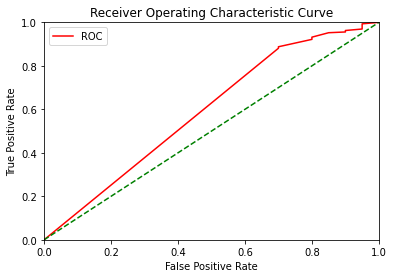

AUC: 0.591751700680272


In [10]:
from sklearn.tree import DecisionTreeClassifier

# parameters for tuning
parameters = {
    'max_depth': range(1, 25),
    'min_samples_leaf':[5,10,20,50,100]
}

# model selection (hyperparameter tuning)
model = tuning(X_train, y_train, DecisionTreeClassifier(random_state=10, criterion='gini'), parameters, make_scorer(recall_minority))
# fit model
model = default_model(X_train, y_train, X_test, y_test, model)
# classification results by 10-fold cross validation
cross_validation(X_train, y_train, model, StratifiedKFold(n_splits=10), make_scorer(recall_minority))
# plot roc curve and AUC
plot_roc_curve(X_test, y_test, model)

### (d)

Using SMOTE algorithm, the minority class in the training set can be oversampled so we can augment an imbalanced data to a balanced data.

In [11]:
from collections import Counter
from imblearn.over_sampling import SMOTE, RandomOverSampler, BorderlineSMOTE

def imbalance(X,y):
    print('Original dataset shape %s' % Counter(y))
    sm = BorderlineSMOTE(random_state=1)
    X_res, y_res = sm.fit_resample(X, y)
    print('Resampled dataset shape %s' % Counter(y_res))
    return(X_res, y_res)

X_train_balanced, y_train_balanced = imbalance(X_train,y_train)

Original dataset shape Counter({1.0: 1169, 0.0: 84})
Resampled dataset shape Counter({1.0: 1169, 0.0: 1169})


### (e)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best Parameters: {'min_samples_leaf': 5, 'max_depth': 10} 

Accuracy Score of train data =  0.9615055603079555
Accuracy Score of test data  =  0.8630573248407644
f1-Score of train data = 0.9613069647463457
f1-Score of test data  = 0.9254766031195841

 Classification Report for Test Data 

              precision    recall  f1-score   support

         0.0       0.13      0.20      0.16        20
         1.0       0.94      0.91      0.93       294

    accuracy                           0.86       314
   macro avg       0.54      0.55      0.54       314
weighted avg       0.89      0.86      0.88       314

Cross Validation accuracy scores: [0.71794872 0.97435897 0.96581197 0.95726496 0.90598291 0.94871795
 0.97435897 0.98290598 0.94827586 0.94871795]
Cross Validation accuracy: 0.932


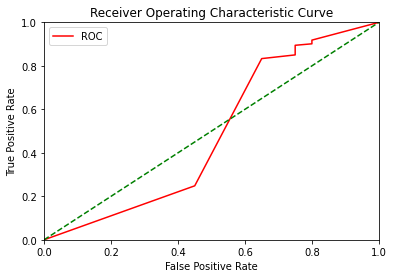

AUC: 0.4849489795918367


In [12]:
from sklearn.tree import DecisionTreeClassifier

# parameters for tuning
parameters = {
    'max_depth': range(1, 25),
    'min_samples_leaf':[5,10,20,50,100]
}

# model selection (hyperparameter tuning)
model = tuning(X_train_balanced, y_train_balanced, DecisionTreeClassifier(random_state=10, criterion='gini'), parameters, make_scorer(recall_minority))
# fit model
model = default_model(X_train_balanced, y_train_balanced, X_test, y_test, model)
# classification results by 10-fold cross validation
cross_validation(X_train_balanced, y_train_balanced, model, StratifiedKFold(n_splits=10), make_scorer(recall_minority))
# plot roc curve and AUC
plot_roc_curve(X_test, y_test, model)

### (f)

(e) has a way better cross validation accuracy than (c) after dealing with the imbalanced data. However, since those resampled data are added artificially in a great amount (1169 - 84), in the ROC curve the recall (TPR) increses very slow at the beginning which causes the AUC of (e) to be way lower than (c). 

### (g)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best Parameters: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 5, 'max_depth': 2, 'criterion': 'gini'} 

Accuracy Score of train data =  0.9329608938547486
Accuracy Score of test data  =  0.9363057324840764
f1-Score of train data = 0.9653179190751445
f1-Score of test data  = 0.9671052631578947

 Classification Report for Test Data 

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        20
         1.0       0.94      1.00      0.97       294

    accuracy                           0.94       314
   macro avg       0.47      0.50      0.48       314
weighted avg       0.88      0.94      0.91       314

Cross Validation accuracy scores: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Cross Validation accuracy: 0.000


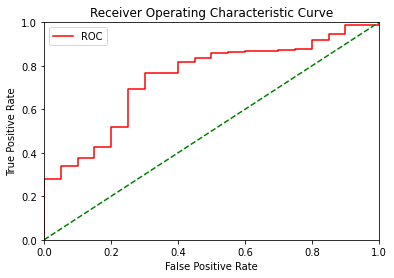

AUC: 0.7437074829931972


In [13]:
from sklearn.ensemble import RandomForestClassifier

# parameters for tuning
parameters = {
    'criterion':['gini','entropy'],
    'n_estimators': [10, 50, 100, 150, 200],
    'max_depth': range(1, 25),
    'min_samples_split':[5,10],
    'min_samples_leaf':[5,10]
}

# model selection (hyperparameter tuning)
model = tuning(X_train, y_train, RandomForestClassifier(random_state=10), parameters, make_scorer(recall_minority))
# fit model
model = default_model(X_train, y_train, X_test, y_test, model)
# classification results by 10-fold cross validation
cross_validation(X_train, y_train, model, StratifiedKFold(n_splits=10), make_scorer(recall_minority))
# plot roc curve and AUC
plot_roc_curve(X_test, y_test, model)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best Parameters: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 5, 'max_depth': 8, 'criterion': 'entropy'} 

Accuracy Score of train data =  0.9901625320786998
Accuracy Score of test data  =  0.9171974522292994
f1-Score of train data = 0.9902085994040016
f1-Score of test data  = 0.9565217391304347

 Classification Report for Test Data 

              precision    recall  f1-score   support

         0.0       0.20      0.10      0.13        20
         1.0       0.94      0.97      0.96       294

    accuracy                           0.92       314
   macro avg       0.57      0.54      0.54       314
weighted avg       0.89      0.92      0.90       314

Cross Validation accuracy scores: [0.75213675 1.         0.98290598 1.         0.98290598 0.98290598
 0.99145299 0.99145299 0.97413793 1.        ]
Cross Validation accuracy: 0.966


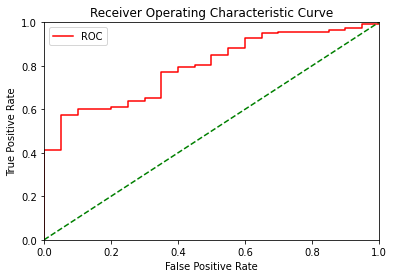

AUC: 0.7938775510204082


In [14]:
from sklearn.ensemble import RandomForestClassifier

# parameters for tuning
parameters = {
    'criterion':['gini','entropy'],
    'n_estimators': [10, 50, 100, 150, 200],
    'max_depth': range(1, 25),
    'min_samples_split':[5,10],
    'min_samples_leaf':[5,10]
}

# model selection (hyperparameter tuning)
model = tuning(X_train_balanced, y_train_balanced, RandomForestClassifier(random_state=10), parameters, make_scorer(recall_minority))
# fit model
model = default_model(X_train_balanced, y_train_balanced, X_test, y_test, model)
# classification results by 10-fold cross validation
cross_validation(X_train_balanced, y_train_balanced, model, StratifiedKFold(n_splits=10), make_scorer(recall_minority))
# plot roc curve and AUC
plot_roc_curve(X_test, y_test, model)

In the prepared dataset, the model have 0 recall on the bad label which causes 0 cross validation accuracy. After dealing with the imbalanced data the result has a way better cross validation accuracy (0.966) than before (0.000). Also we learned that imbalanced data can hurt Random Forest models significantly.

### (h)

XGBClassifier is a similar but regularized model of the Gradient Boosting Decision Tree. Since XGBClassifier can run faster and more accurate compare to the Gradient Boosting Decision Tree, we prefer to use this model in this problem.

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best Parameters: {'subsample': 0.6, 'n_estimators': 300, 'max_depth': 4, 'learning_rate': 0.2, 'gamma': 5, 'colsample_bytree': 0.2} 

Accuracy Score of train data =  0.9704708699122107
Accuracy Score of test data  =  0.9394904458598726
f1-Score of train data = 0.984421052631579
f1-Score of test data  = 0.9686985172981878

 Classification Report for Test Data 

              precision    recall  f1-score   support

         0.0       1.00      0.05      0.10        20
         1.0       0.94      1.00      0.97       294

    accuracy                           0.94       314
   macro avg       0.97      0.53      0.53       314
weighted avg       0.94      0.94      0.91       314

Cross Validation accuracy scores: [0.    0.    0.    0.    0.    0.125 0.    0.    0.    0.   ]
Cross Validation accuracy: 0.013


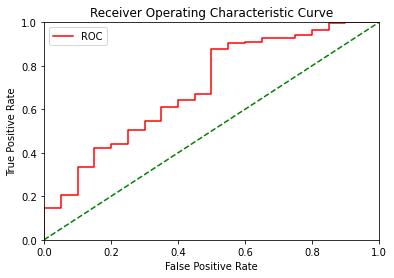

AUC: 0.698639455782313


In [15]:
# from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

# parameters for tuning
parameters = {
    'n_estimators':[10,50,100,150,200,300,500],
    'max_depth': range(1,25),
    'learning_rate': [0.01,0.1,0.2],
    'colsample_bytree':[0.1,0.2,0.3],
    'subsample':[0.2,0.4,0.6,0.8,1],
    'gamma':[5,10,15]
}

# model selection (hyperparameter tuning)
model = tuning(X_train, y_train, XGBClassifier(random_state=10), parameters, make_scorer(recall_minority))
# fit model
model = default_model(X_train, y_train, X_test, y_test, model)
# classification results by 10-fold cross validation
cross_validation(X_train, y_train, model, StratifiedKFold(n_splits=10), make_scorer(recall_minority))
# plot roc curve and AUC
plot_roc_curve(X_test, y_test, model)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best Parameters: {'subsample': 0.6, 'n_estimators': 300, 'max_depth': 4, 'learning_rate': 0.2, 'gamma': 5, 'colsample_bytree': 0.2} 

Accuracy Score of train data =  0.9893071000855432
Accuracy Score of test data  =  0.910828025477707
f1-Score of train data = 0.9893932965634281
f1-Score of test data  = 0.9530201342281879

 Classification Report for Test Data 

              precision    recall  f1-score   support

         0.0       0.17      0.10      0.12        20
         1.0       0.94      0.97      0.95       294

    accuracy                           0.91       314
   macro avg       0.55      0.53      0.54       314
weighted avg       0.89      0.91      0.90       314

Cross Validation accuracy scores: [0.64102564 1.         0.99145299 0.99145299 1.         1.
 1.         0.99145299 1.         1.        ]
Cross Validation accuracy: 0.962


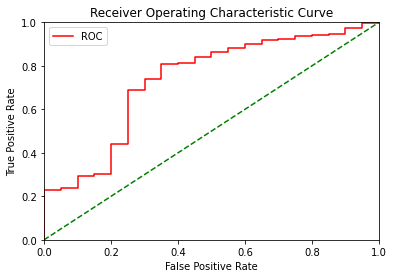

AUC: 0.7343537414965987


In [16]:
from xgboost import XGBClassifier

# parameters for tuning
parameters = {
    'n_estimators':[10,50,100,150,200,300,500],
    'max_depth': range(1,25),
    'learning_rate': [0.01,0.1,0.2],
    'colsample_bytree':[0.1,0.2,0.3],
    'subsample':[0.2,0.4,0.6,0.8,1],
    'gamma':[5,10,15]
}

# model selection (hyperparameter tuning)
model = tuning(X_train_balanced, y_train_balanced, XGBClassifier(random_state=10), parameters, make_scorer(recall_minority))
# fit model
model = default_model(X_train_balanced, y_train_balanced, X_test, y_test, model)
# classification results by 10-fold cross validation
cross_validation(X_train_balanced, y_train_balanced, model, StratifiedKFold(n_splits=10), make_scorer(recall_minority))
# plot roc curve and AUC
plot_roc_curve(X_test, y_test, model)

In the prepared dataset, the model have 0.05 recall on the bad label which causes only 0.013 cross validation accuracy. After dealing with the imbalanced data the result has a way better cross validation accuracy (0.962) than before (0.013). Also we learned that imbalanced data can hurt Gradient Boosting Decision Tree models significantly.

Reference: https://www.kaggle.com/code/srkvinu/uci-secom-semiconductor-manufacturing-process-fmt

## 2.

### (a)

In [17]:
# Read Data
MiningProcess_data_df = pd.read_csv("MiningProcess_Flotation_Plant_Database.csv", thousands=',')
# print data
display(MiningProcess_data_df)

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,552,1698,301953,557434,395713,100664,174,249214,253235,...,250884,457396,432962,424954,443558,502255,44637,523344,6691,131
1,2017-03-10 01:00:00,552,1698,302441,563965,397383,100672,174,249719,250532,...,248994,451891,42956,432939,448086,496363,445922,498075,6691,131
2,2017-03-10 01:00:00,552,1698,304346,568054,399668,10068,174,249741,247874,...,248071,45124,468927,43461,449688,484411,447826,458567,6691,131
3,2017-03-10 01:00:00,552,1698,304736,568665,397939,100689,174,249917,254487,...,251147,452441,458165,442865,44621,471411,43769,427669,6691,131
4,2017-03-10 01:00:00,552,1698,303369,558167,400254,100697,174,250203,252136,...,248928,452441,4529,450523,45367,462598,443682,425679,6691,131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737448,2017-09-09 23:00:00,4975,232,271094,441052,38657,962129,165365,302344,298786,...,313695,39216,430702,872008,418725,497548,446357,416892,6427,171
737449,2017-09-09 23:00:00,4975,232,269201,473436,384939,962063,165352,303013,301879,...,2367,401505,404616,864409,418377,506398,372995,426337,6427,171
737450,2017-09-09 23:00:00,4975,232,26922,500488,383496,961874,165338,303662,307397,...,225879,408899,399316,867598,419531,503414,336035,43313,6427,171
737451,2017-09-09 23:00:00,4975,232,116412,491548,384976,961686,165324,30255,301959,...,308115,405107,466832,876591,407299,502301,340844,433966,6427,171


### (a)

In [18]:
MiningProcess_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737453 entries, 0 to 737452
Data columns (total 24 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   date                          737453 non-null  object
 1   % Iron Feed                   737453 non-null  int64 
 2   % Silica Feed                 737453 non-null  int64 
 3   Starch Flow                   737453 non-null  int64 
 4   Amina Flow                    737453 non-null  int64 
 5   Ore Pulp Flow                 737453 non-null  int64 
 6   Ore Pulp pH                   737453 non-null  int64 
 7   Ore Pulp Density              737453 non-null  int64 
 8   Flotation Column 01 Air Flow  737453 non-null  int64 
 9   Flotation Column 02 Air Flow  737453 non-null  int64 
 10  Flotation Column 03 Air Flow  737453 non-null  int64 
 11  Flotation Column 04 Air Flow  737453 non-null  int64 
 12  Flotation Column 05 Air Flow  737453 non-null  int64 
 13 

In [19]:
# Linear Regression
y = MiningProcess_data_df['% Silica Concentrate']
X_ar = np.array(MiningProcess_data_df.iloc[:, 1:22])
xnames = np.array(MiningProcess_data_df.columns[1:22])
X = pd.DataFrame(X_ar,columns = xnames)
X = sm.add_constant(X)

log = sm.OLS(y, X)
result = log.fit()

In [20]:
# Rank Variables
ranked = pd.concat([result.tvalues, result.pvalues], keys = ["tvalues", "pvalues"], axis=1)
ranked.sort_values(by=['tvalues'], inplace = True)

# Display variables with p-values < 0.01
ranked = ranked[ranked.pvalues < 0.01]
display(ranked)

,tvalues,pvalues
Flotation Column 06 Air Flow,-30.256391,5.713975e-201
Ore Pulp Flow,-21.546524,6.141877e-103
Flotation Column 04 Level,-21.539929,7.081031e-103
Starch Flow,-17.722323,2.916744e-70
Flotation Column 07 Air Flow,-14.324681,1.556569e-46
Flotation Column 01 Air Flow,-13.921407,4.756464e-44
Amina Flow,-11.300863,1.306659e-29
Flotation Column 02 Level,-8.061187,7.566898e-16
Flotation Column 02 Air Flow,-5.751702,8.838420e-09
Flotation Column 05 Level,-5.113382,3.165198e-07


After sorting the featrues by tvalue and eliminated the p-values < 0.01, the importance of the features are ranked as the above.

### (b)

We use forward selection and evaluate models by p_value to find important values below.

In [21]:
def forward_selection(data, target, significance_level=0.05):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

X = MiningProcess_data_df.iloc[:, 1:22]
y = MiningProcess_data_df['% Silica Concentrate']
forward_selection(X,y)

['Flotation Column 03 Level',
 'Flotation Column 04 Air Flow',
 'Flotation Column 06 Air Flow',
 'Flotation Column 01 Air Flow',
 'Flotation Column 03 Air Flow',
 'Flotation Column 04 Level',
 'Flotation Column 05 Air Flow',
 'Ore Pulp Flow',
 'Ore Pulp pH',
 'Starch Flow',
 '% Silica Feed',
 'Flotation Column 07 Air Flow',
 'Amina Flow',
 '% Iron Feed',
 'Flotation Column 01 Level',
 'Flotation Column 02 Level',
 'Flotation Column 02 Air Flow',
 'Flotation Column 07 Level',
 'Flotation Column 05 Level',
 'Flotation Column 06 Level']

Reference: https://www.analyticsvidhya.com/blog/2020/10/a-comprehensive-guide-to-feature-selection-using-wrapper-methods-in-python/

### (c)

The results are quite similar. However, both of them can't detect highly correlated features which causes them to pick highly correlated features as important features.

### (d)

Fit a Ridge regression, rank the importance of them by the coefficent of features and delete features with coefficent = 0 .

In [22]:
from sklearn import linear_model

regressor = linear_model.Ridge(alpha=1,
                               positive=True,
                               fit_intercept=False, 
                               max_iter=1000,
                               tol=0.0001)
X = MiningProcess_data_df.iloc[:, 1:22]
y = MiningProcess_data_df['% Silica Concentrate']
name = MiningProcess_data_df.columns[1:22]
regressor.fit(X, y)
print(regressor.coef_)

data = {"name": np.array(name),
       "coef": np.array(regressor.coef_)}
ranked = pd.DataFrame(data)
ranked.sort_values(by=['coef'], inplace = True)
ranked = ranked[ranked.coef > 0]
display(ranked)

[0.         0.         0.         0.         0.         0.00005516
 0.         0.00019239 0.         0.00147126 0.00064243 0.00079713
 0.         0.         0.         0.         0.00033893 0.
 0.         0.         0.        ]


,name,coef
1,% Silica Feed,3.468169e-11
0,% Iron Feed,1.339654e-10
5,Ore Pulp pH,5.516018e-05
7,Flotation Column 01 Air Flow,1.923942e-04
16,Flotation Column 03 Level,3.389298e-04
10,Flotation Column 04 Air Flow,6.424317e-04
11,Flotation Column 05 Air Flow,7.971307e-04
9,Flotation Column 03 Air Flow,1.471263e-03


### (e)

Fit a Lasso regression, rank the importance of them by the coefficent of features and delete features with coefficent = 0 .

In [23]:
from sklearn import linear_model

regressor = linear_model.Lasso(alpha=1,
                               positive=True,
                               fit_intercept=False, 
                               max_iter=1000,
                               tol=0.0001)
X = MiningProcess_data_df.iloc[:, 1:22]
y = MiningProcess_data_df['% Silica Concentrate']
name = MiningProcess_data_df.columns[1:22]
regressor.fit(X, y)
print(regressor.coef_)

data = {"name": np.array(name),
       "coef": np.array(regressor.coef_)}
ranked = pd.DataFrame(data)
ranked.sort_values(by=['coef'], inplace = True, ascending = False)
ranked = ranked[ranked.coef > 0]
display(ranked)

[245503.9912862  558262.41132699      0.              0.
      0.              0.00388255      0.              0.
      0.              0.00161249      0.00031234      0.00043035
      0.              0.              0.              0.
      0.000176        0.              0.              0.
      0.        ]


,name,coef
1,% Silica Feed,558262.411327
0,% Iron Feed,245503.991286
5,Ore Pulp pH,0.003883
9,Flotation Column 03 Air Flow,0.001612
11,Flotation Column 05 Air Flow,0.000430
10,Flotation Column 04 Air Flow,0.000312
16,Flotation Column 03 Level,0.000176


### (f)

The results are quite similar both reduces a large amount of useless features. However, both of them can't detect highly correlated features which causes them to pick some highly correlated features as important features.

### (g)

Print highly correlated feature pairs with Corr coef > 0.7.

In [24]:
# Correlated independent features
def high_corr(df, threshold):
    corr = pd.DataFrame(abs(df.corr()))

    Featurei = []
    Featurej = []
    Corr = []

    for i in corr.index:
        for j in corr.columns:
            if (corr.loc[i, j] > threshold and i != j):
                if(i not in Featurei):
                    Featurei.append(i)
                if(j not in Featurej):
                    Featurej.append(j)
                    Corr.append(corr.loc[i, j])
    
    d = pd.DataFrame([Featurei, Featurej, Corr]).transpose()
    display(d)

high_corr(MiningProcess_data_df, 0.7)

,0,1,2
0,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,0.80282
1,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,0.857379
2,Flotation Column 03 Air Flow,Flotation Column 01 Air Flow,0.80282
3,Flotation Column 04 Air Flow,Flotation Column 05 Air Flow,0.854517
4,Flotation Column 05 Air Flow,Flotation Column 04 Air Flow,0.854517
5,Flotation Column 04 Level,Flotation Column 05 Level,0.75043
6,Flotation Column 05 Level,Flotation Column 06 Level,0.708516
7,Flotation Column 06 Level,Flotation Column 07 Level,0.747293
8,Flotation Column 07 Level,Flotation Column 04 Level,0.75043


Yes, if we use linear regression for prediction, multicollinearity may happen.

### (h)

"% Iron Concentrate" and "% Silica Concentrate" may be highly correlated (According to the chemistry rules, "% Iron Concentrate" is proportional to "% Silica Concentrate".), since both of them are the result (target) of the process not a feature of the process so in most situation we may not get "% Iron Concentrate" as a feature. If we can get "% Iron Concentrate" we won't need to do prediction. To solve this problem we just need to remove "% Iron Concentrate".

## 3.

### (a)

In this problem we will create a cnn model and train it in pytorch. The three hyperparameters LR (Learning rate) = 0.01, batch_size = 100 and the amount of hidden layer is near optimal after experiments with different parameters (e.g. LR = 1, 0.1, 0.005; batch_size = 50, 150; hidden layer add more cnn and linear layer).

In [25]:
# Import necessary packages.
import numpy as np
import pandas as pd
import torch
import os
import torch.nn as nn
import torchvision.transforms as transforms
from PIL import Image
# "ConcatDataset" and "Subset" are possibly useful when doing semi-supervised learning.
from torch.utils.data import ConcatDataset, DataLoader, Subset, Dataset
from torchvision.datasets import DatasetFolder, VisionDataset

import torch.nn.functional as F
from torch.autograd import Variable
import matplotlib.pyplot as plt

# This is for the progress bar.
from tqdm.auto import tqdm
import random

# set fixed random seed
random_seed = 1
torch.manual_seed(random_seed)

In [26]:
# Read training data
DRtraining_df = pd.read_excel("MDS_Assignment3_DRtraining.xlsx")

# Split train test
X_raw = DRtraining_df.iloc[:, 1:257]
y_raw = DRtraining_df.iloc[:, -10:]
y_raw = np.array(y_raw)

X = []
for i in range(X_raw.shape[0]):
    X.append(np.array(X_raw.iloc[i]).reshape((16, 16)))
y = np.argmax(y_raw, axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# transfer to torch tensor
X_train = torch.tensor(np.array(X_train).astype('float32'))
y_train = torch.tensor(np.array(y_train).astype('float32')).type(torch.LongTensor)

X_test = torch.tensor(np.array(X_test).astype('float32'))
y_test = torch.tensor(np.array(y_test).astype('float32')).type(torch.LongTensor)

# Pytorch train and test TensorDataset
train = torch.utils.data.TensorDataset(X_train, y_train)
test = torch.utils.data.TensorDataset(X_test, y_test)

In [27]:
# Hyper Parameters
# batch_size, epoch and iteration
LR = 0.01
batch_size = 100
patience = 50 # If no improvement in 'patience' epochs, early stop
n_iters = 10000
num_epochs = n_iters / (len(X_train) / batch_size)
num_epochs = int(num_epochs)

In [28]:
# Pytorch DataLoader
train_loader = torch.utils.data.DataLoader(train, batch_size = batch_size, shuffle = True)
test_loader = torch.utils.data.DataLoader(test, batch_size = batch_size, shuffle = True)

In [29]:
# Create CNN Model
class CNN_Model(nn.Module):
    def __init__(self):
        super(CNN_Model, self).__init__()
        
        self.cnn = nn.Sequential(
            # Convolution 1 , input_shape=(1,16,16)
            nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, stride=1, padding=1), #output_shape=(16,16,16)
            nn.BatchNorm2d(16),
            nn.ReLU(), # activation
            nn.MaxPool2d(kernel_size=2), #output_shape=(16,8,8) # Max pool 1
            
            # Convolution 2
            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1), #output_shape=(32,8,8)
            nn.BatchNorm2d(32),
            nn.ReLU(), # activation
            nn.MaxPool2d(kernel_size=2), #output_shape=(32,4,4)  # Max pool 2
        )
        self.fc = nn.Sequential(
            # Fully connected 1 ,#input_shape=(32*4*4)
            nn.Linear(32 * 4 * 4, 10)
        )
    
    def forward(self, x):
        out = self.cnn(x)
        out = out.view(out.size()[0], -1)
        return self.fc(out)

In [30]:
best_model = {}
def fit_model(model, loss_func, optimizer, input_shape, num_epochs, train_loader, test_loader):
    # Traning the Model
    #history-like list for store loss & acc value
    training_loss = []
    training_accuracy = []
    validation_loss = []
    validation_accuracy = []
    
    stale = 0
    best_acc = 0
    
    for epoch in range(num_epochs):
        
        # ---------- Training ----------
        # Make sure the model is in train mode before training.
        model.train()
        
        #training model & store loss & acc / epoch
        correct_train = 0
        total_train = 0
        for i, (images, labels) in enumerate(train_loader):
            # 1.Define variables
            train = Variable(images.view(input_shape))
            labels = Variable(labels)
            # 2.Clear gradients
            optimizer.zero_grad()
            # 3.Forward propagation
            outputs = model(train)
            # 4.Calculate softmax and cross entropy loss
            train_loss = loss_func(outputs, labels)
            # 5.Calculate gradients
            train_loss.backward()
            # 6.Update parameters
            optimizer.step()
            # 7.Get predictions from the maximum value
            predicted = torch.max(outputs.data, 1)[1]
            # 8.Total number of labels
            total_train += len(labels)
            # 9.Total correct predictions
            correct_train += (predicted == labels).float().sum()
        #10.store val_acc / epoch
        train_accuracy = 100 * correct_train / float(total_train)
        training_accuracy.append(train_accuracy)
        # 11.store loss / epoch
        training_loss.append(train_loss.data)

        # ---------- Validation ----------
        # Make sure the model is in eval mode so that some modules like dropout are disabled and work normally.
        model.eval()

        #evaluate model & store loss & acc / epoch
        correct_test = 0
        total_test = 0
        for images, labels in test_loader:
            # 1.Define variables
            test = Variable(images.view(input_shape))
            # 2.Forward propagation
            outputs = model(test)
            # 3.Calculate softmax and cross entropy loss
            val_loss = loss_func(outputs, labels)
            # 4.Get predictions from the maximum value
            predicted = torch.max(outputs.data, 1)[1]
            # 5.Total number of labels
            total_test += len(labels)
            # 6.Total correct predictions
            correct_test += (predicted == labels).float().sum()
        #6.store val_acc / epoch
        val_accuracy = 100 * correct_test / float(total_test)
        validation_accuracy.append(val_accuracy)
        # 11.store val_loss / epoch
        validation_loss.append(val_loss.data)
        
        # update logs
        if val_accuracy > best_acc:
            with open(f"./log.txt","a"):
                print(f"[ epoch | {epoch + 1:03d}/{num_epochs:03d} ] error of training data = {train_loss.data:.5f} , error of testing data = {val_loss.data:.5f}, accuracy = {val_accuracy:.5f} -> best")
        else:
            with open(f"./log.txt","a"):
                print(f"[ epoch | {epoch + 1:03d}/{num_epochs:03d} ] error of training data = {train_loss.data:.5f}, error of testing data = {val_loss.data:.5f}, accuracy = {val_accuracy:.5f}")

        # save models
        if val_accuracy > best_acc:
            print(f"Best model found at epoch {epoch + 1}, saving model")
            torch.save(model.state_dict(), "best.pt") # only save best to prevent output memory exceed error
            best_acc = val_accuracy
            stale = 0
        else:
            stale += 1
            if stale > patience:
                print(f"No improvment {patience} consecutive epochs, early stopping")
                break

    return training_loss, training_accuracy, validation_loss, validation_accuracy

In [31]:
# Execution

# "cuda" only when GPUs are available.
device = "mps" if torch.backends.mps.is_available() else "cpu" # change mps to cuda if nvidia gpu
# Initialize a model, and put it on the device specified.
model = CNN_Model().to(device)

# create model
model = CNN_Model()
print(model)
optimizer = torch.optim.Adam(model.parameters(), lr=LR)   # optimize all cnn parameters
loss_func = nn.CrossEntropyLoss()   # the target label is not one-hotted
input_shape = (-1,1,16,16)

# train model
training_loss, training_accuracy, validation_loss, validation_accuracy = fit_model(model, loss_func, optimizer, input_shape, num_epochs, train_loader, test_loader)

CNN_Model(
  (cnn): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc): Sequential(
    (0): Linear(in_features=512, out_features=10, bias=True)
  )
)
[ epoch | 001/792 ] error of training data = 0.36583 , error of testing data = 0.58996, accuracy = 90.50633 -> best
Best model found at epoch 1, saving model
[ epoch | 002/792 ] error of training data = 0.27570 , error of testing data = 0.11156, accuracy = 94.30379 -> best
Best model found at epoch 2, saving model
[ epoch | 003/792 ] error of train

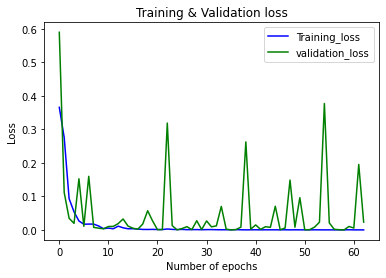

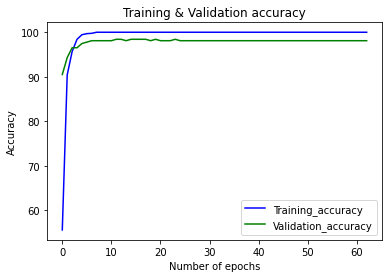

In [32]:
# visualization
plt.plot(range(len(training_loss)), training_loss, 'b-', label='Training_loss')
plt.plot(range(len(validation_loss)), validation_loss, 'g-', label='validation_loss')
plt.title('Training & Validation loss')
plt.xlabel('Number of epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.plot(range(len(training_accuracy)), training_accuracy, 'b-', label='Training_accuracy')
plt.plot(range(len(validation_accuracy)), validation_accuracy, 'g-', label='Validation_accuracy')
plt.title('Training & Validation accuracy')
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Final result with best model:

Accuracy = 98.41772, Convergence time is approximatly 24 epochs, Error of training data = 0.00359, Error of testing data = 0.01065

### (b)

In [33]:
model_best = CNN_Model().to("cpu")
model_best.load_state_dict(torch.load("best.pt"))
model_best.eval()
prediction = []

# Read training data
DRpredict_df = pd.read_excel("MDS_Assignment3_DRpredict.xlsx")
# Split train test
X_raw_pred = DRpredict_df.iloc[:, 1:257]
X_pred = []
for i in range(X_raw_pred.shape[0]):
    X_pred.append(np.array(X_raw_pred.iloc[i]).reshape((16, 16)))
# transfer to torch tensor
X_pred = torch.tensor(np.array(X_pred).astype('float32'))

with torch.no_grad():
    for data in X_pred:
        test_pred = model_best(data.expand(1,1,16,16))
        test_label = np.argmax(test_pred.cpu().data.numpy(), axis=1)
        prediction += test_label.tolist()

In [34]:
# initialize data of lists.
data = {'No.': range(1579, 1594),
        'Digit Number (0-9) predict': prediction}
  
# Create DataFrame
df = pd.DataFrame(data)
print(df.to_string(index=False))

 No.  Digit Number (0-9) predict
1579                           4
1580                           0
1581                           5
1582                           0
1583                           5
1584                           0
1585                           5
1586                           0
1587                           2
1588                           5
1589                           7
1590                           0
1591                           2
1592                           5
1593                           7


Reference: https://hackmd.io/@lido2370/SJMPbNnKN?type=view